## Modeling the accretion rate for the following

### Install these packages
using Pkg; Pkg.add(package)

In [64]:
using QuadGK
using SpecialFunctions
using Plots

In [155]:
N=100
rho_w = 998
rho_a = 1.2
rho_ice = 0.917e3
g = 9.81
mu_w = 1e-3
mu_a = 1.75e-5
C_d = 0.55
m_e = 3
r_0 = 1e-3
r_0_ice = 1e-5
r_0 = 1e-3
n_0 = 16e6
n_0_ice = 2e7
q_rai = LinRange(1e-8, 5e-3, N)
q_ice = 1e-4
E_cp = 0.8
E_ir = 1
v_e = 1/2
a_e = 2
# q_c = LinRange(5e-8, 1, 2)

2

In [93]:
m_0 = 4*pi*rho_w*r_0*r_0*r_0/3
m_0_ice = 4*pi*rho_ice*r_0_ice*r_0_ice*r_0_ice/3
a_0 = pi*r_0*r_0
a_0_ice = pi*r_0_ice*r_0_ice
v_0_kin = sqrt((8*g*r_0*(rho_w - rho_a))/(3*C_d*rho_a))
v_0_sto = 2*r_0*r_0*g*(rho_w - rho_a)/(9*mu_w)
lambda_ice = ((gamma(m_e+1)*m_0_ice*n_0_ice)/(q_ice*rho_a*(r_0_ice^m_e)))^(1/(m_e+1))
lambda_rai = [((gamma(m_e+1)*m_0*n_0)/(q*rho_a*(r_0^m_e)))^(1/(m_e+1)) for q in q_rai];

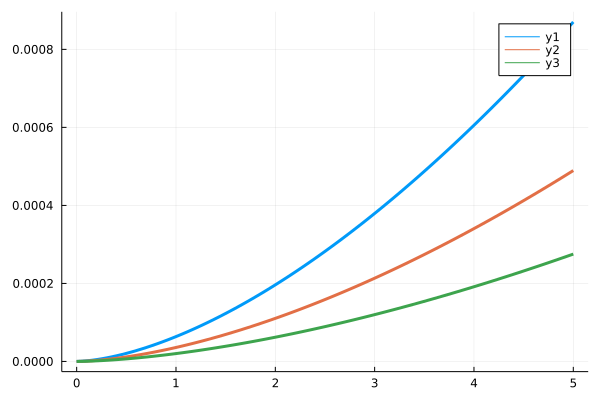

In [88]:
q_ice = 1e-4
lambda_ice = ((gamma(m_e+1)*m_0_ice*n_0_ice)/(q_ice*rho_a*(r_0_ice^m_e)))^(1/(m_e+1))
ac_rain_ice_kin = [n_0*n_0_ice*m_0*a_0*v_0_kin*E_ir*gamma(m_e+a_e+v_e+1)/(((lambda_rai[i])^(1+a_e+v_e+m_e))*(r_0^(a_e+v_e+m_e))*lambda_ice*rho_a)
    for i in 1:N]
plot(q_rai*1e3, ac_rain_ice_kin, linewidth=3)
q_ice = 1e-5
lambda_ice = ((gamma(m_e+1)*m_0_ice*n_0_ice)/(q_ice*rho_a*(r_0_ice^m_e)))^(1/(m_e+1))
ac_rain_ice_kin = [n_0*n_0_ice*m_0*a_0*v_0_kin*E_ir*gamma(m_e+a_e+v_e+1)/(((lambda_rai[i])^(1+a_e+v_e+m_e))*(r_0^(a_e+v_e+m_e))*lambda_ice*rho_a)
    for i in 1:N]
plot!(q_rai*1e3, ac_rain_ice_kin, linewidth=3)
q_ice = 1e-6
lambda_ice = ((gamma(m_e+1)*m_0_ice*n_0_ice)/(q_ice*rho_a*(r_0_ice^m_e)))^(1/(m_e+1))
ac_rain_ice_kin = [n_0*n_0_ice*m_0*a_0*v_0_kin*E_ir*gamma(m_e+a_e+v_e+1)/(((lambda_rai[i])^(1+a_e+v_e+m_e))*(r_0^(a_e+v_e+m_e))*lambda_ice*rho_a)
    for i in 1:N]
plot!(q_rai*1e3, ac_rain_ice_kin, linewidth=3)

In [184]:
f_kin(r) = [q_rai[i]*exp(-lambda_rai[i]*r)*r^(5/2) for i in 1:N]
f_sto(r) = [q_rai[i]*exp(-lambda_rai[i]*r)*r^(4) for i in 1:N]
I_kin,err_kin = quadgk(f_kin, 0, Inf, rtol=1e-8)
I_sto,err_sto = quadgk(f_sto, 0, Inf, rtol=1e-8)
ac_rain_kin = [n_0*a_0*v_0_kin*E_cp*(r_0^(-5/2))*I_kin[i] for i in 1:N];
ac_rain_sto = [n_0*a_0*v_0_sto*E_cp*(r_0^(-4))*I_sto[i] for i in 1:N];

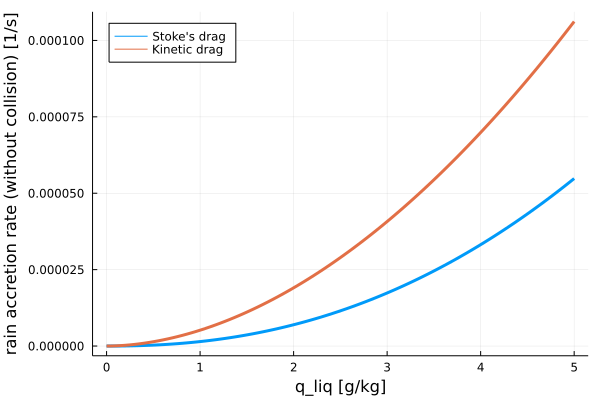

In [185]:
plot(q_rai*1e3, ac_rain_sto, linewidth=3, xlabel="q_liq [g/kg]", ylabel="rain accretion rate (without collision) [1/s]", label="Stoke's drag", legend=:topleft)
plot!(q_rai*1e3, ac_rain_kin, linewidth=3, xlabel="q_liq [g/kg]", ylabel="rain accretion rate (without collision) [1/s]", label="Kinetic drag")

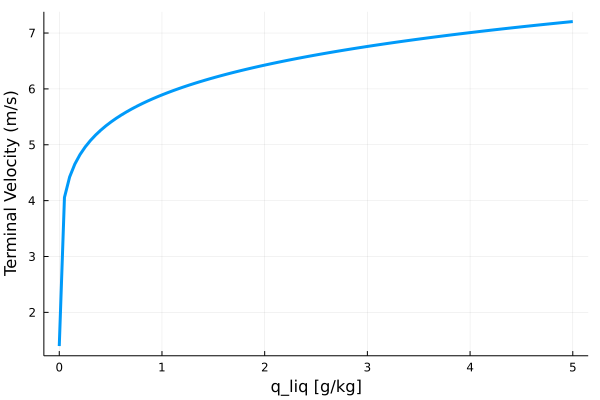

In [196]:
v_t = [v_0_kin*((r_0*lambda_rai[i])^(-v_e))*gamma(v_e+m_e+1)/gamma(m_e+1) for i in 1:100];
plot(q_rai*1e3, v_t[:], linewidth=3, xlabel="q_liq [g/kg]", ylabel="Terminal Velocity (m/s)", label="Rain",legend = false)

### Snowflake modeling
#### 1. Height proportional radius case

$h = \alpha r$

In [192]:
rho_0 = 1
rho_s = 0.5e3
C_d_snow = 1.3
r_0_snow = 1e-3
m_0_snow = 0.1*r_0_snow*r_0_snow
m_e_snow = 2
a_0_snow = 0.3*pi*r_0_snow*r_0_snow
a_e_snow = 2
v_e_snow = 1/2
E_is = 0.1
q_snow = LinRange(1e-8, 5e-3, N)
n_0_snow = [4.36e9*rho_a*q^0.63 for q in q_snow];
alpha = 5e-3
v_0_snow_sto = alpha*g*r_0_snow*r_0_snow*(rho_s - rho_a)/(2*mu_a*(1+sqrt(2+4*alpha)))
Re_snow_sto = v_0_snow_sto*rho_a*r_0_snow/mu_a
# v_0_snow = sqrt(2*alpha*g*r_0_snow*(rho_s - rho_a)/(C_d_snow*rho_a))
# Re_snow_kin = v_0_snow*rho_a*r_0_snow/mu_a
# v_0_snow, v_0_snow_sto
# Re_snow_sto, Re_snow_kin

19.796933275804502

In [205]:
lambda_snow = [((gamma(m_e_snow+1)*m_0_snow*n_0_snow[i])/(q_snow[i]*rho_s*(r_0_snow^m_e_snow)))^(1/(m_e_snow+1)) for i in 1:N];

In [200]:
f_snow_kin(r) = [q_snow[i]*exp(-lambda_snow[i]*r)*r^(5/2) for i in 1:N]
I_snow_kin,err_kin = quadgk(f_snow_kin, 0, Inf, rtol=1e-8);

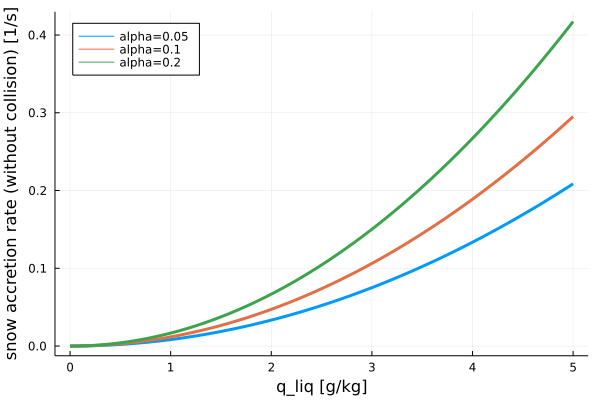

In [212]:
alpha = 0.05
v_0_snow = sqrt(2*alpha*g*r_0_snow*(rho_s - rho_a)/(C_d_snow*rho_a))
ac_snow_kin = [n_0_snow[i]*a_0_snow*v_0_snow*E_is*(r_0_snow^(-5/2))*I_snow_kin[i] for i in 1:N];
plot(q_snow*1e3, ac_snow_kin, linewidth=3, xlabel="q_liq [g/kg]", ylabel="snow accretion rate (without collision) [1/s]", label="alpha=0.05", legend=:topleft)

alpha = 0.1
v_0_snow = sqrt(2*alpha*g*r_0_snow*(rho_s - rho_a)/(C_d_snow*rho_a))
ac_snow_kin = [n_0_snow[i]*a_0_snow*v_0_snow*E_is*(r_0_snow^(-5/2))*I_snow_kin[i] for i in 1:N];
plot!(q_snow*1e3, ac_snow_kin, linewidth=3, xlabel="q_liq [g/kg]", ylabel="snow accretion rate (without collision) [1/s]", label="alpha=0.1")

alpha = 0.2
v_0_snow = sqrt(2*alpha*g*r_0_snow*(rho_s - rho_a)/(C_d_snow*rho_a))
ac_snow_kin = [n_0_snow[i]*a_0_snow*v_0_snow*E_is*(r_0_snow^(-5/2))*I_snow_kin[i] for i in 1:N];
plot!(q_snow*1e3, ac_snow_kin, linewidth=3, xlabel="q_liq [g/kg]", ylabel="snow accretion rate (without collision) [1/s]", label="alpha=0.2")


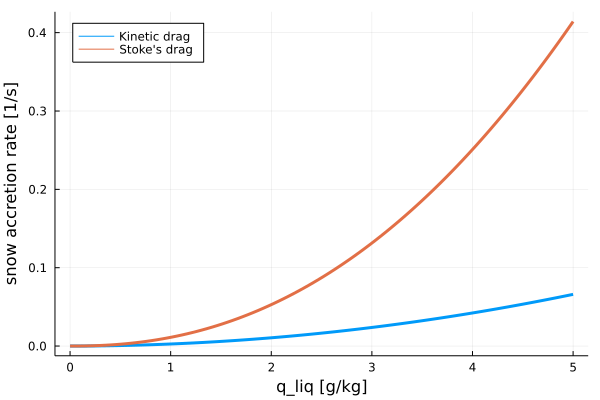

In [213]:
alpha = 5e-3
f_snow_sto(r) = [q_snow[i]*exp(-lambda_snow[i]*r)*r^(4) for i in 1:N]
I_snow_sto,err_kin = quadgk(f_snow_sto, 0, Inf, rtol=1e-8)
v_0_snow = sqrt(2*alpha*g*r_0_snow*(rho_s - rho_a)/(C_d_snow*rho_a))
ac_snow_kin = [n_0_snow[i]*a_0_snow*v_0_snow*E_is*(r_0_snow^(-5/2))*I_snow_kin[i] for i in 1:N];
plot(q_snow*1e3, ac_snow_kin, linewidth=3, xlabel="q_liq [g/kg]", ylabel="snow accretion rate [1/s]", label="Kinetic drag")
ac_snow_sto = [n_0_snow[i]*a_0_snow*v_0_snow*E_is*(r_0_snow^(-4))*I_snow_sto[i] for i in 1:N];
plot!(q_snow*1e3, ac_snow_sto, linewidth=3, xlabel="q_liq [g/kg]", ylabel="snow accretion rate [1/s]", label="Stoke's drag", legend=:topleft)


#### 2. Constant height case

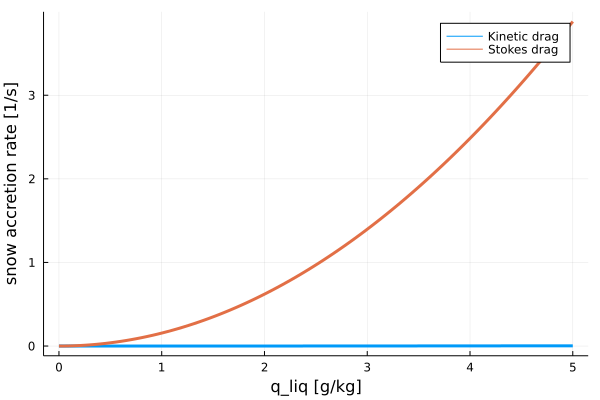

In [222]:
h_0 = 1e-6
v_t_snow_kin = sqrt(2*h_0*g*(rho_s - rho_a)/(C_d_snow*rho_a))
v_t_snow_sto = sqrt(r_0_snow*r_0_snow*h_0*g*(rho_s - rho_a)/(2*mu_a*(r_0_snow*sqrt(2*r_0_snow*r_0_snow + 4*r_0_snow*h_0))))
#
f_snow_kin(r) = [q_snow[i]*exp(-lambda_snow[i]*r)*r^(2) for i in 1:N]
I_snow_kin,err_kin = quadgk(f_snow_kin, 0, Inf, rtol=1e-8)
ac_snow_kin = [n_0_snow[i]*pi*v_t_snow_kin*E_is*I_snow_kin[i] for i in 1:N]
plot(q_snow*1e3, ac_snow_kin, linewidth=3, xlabel="q_liq [g/kg]", ylabel="snow accretion rate [1/s]", label="Kinetic drag")

f_snow_sto(r) = [q_snow[i]*exp(-lambda_snow[i]*r)*r^(4)/(r*sqrt(2*r*r + 4*r*h_0)) for i in 1:N]
I_snow_sto,err_sto = quadgk(f_snow_sto, 0, Inf, rtol=1e-8);
ac_snow_sto = [n_0_snow[i]*pi*h_0*g*((rho_s - rho_a)/(2*mu_a))*E_is*I_snow_sto[i] for i in 1:N];
plot!(q_snow*1e3, ac_snow_sto, linewidth=3, xlabel="q_liq [g/kg]", ylabel="snow accretion rate [1/s]", label="Stokes drag")